In [1]:
# Machine Learning Online Class - Exercise 1: Linear Regression
#
#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions
#  in this exericse:
#
#     warmUpExercise.m
#     plotData.m
#     gradientDescent.m
#     computeCost.m
#     gradientDescentMulti.m
#     computeCostMulti.m
#     featureNormalize.m
#     normalEqn.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
# x refers to the population size in 10,000s
# y refers to the profit in $10,000s

In [21]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [8]:
# ==================== Part 1: Basic Function ====================
# Complete warmUpExercise.m
print('Running warmUpExercise ... \n')
print('5x5 Identity Matrix: \n')
def warmUpExercise():
    return(np.eye(5))

print(warmUpExercise())

Running warmUpExercise ... 

5x5 Identity Matrix: 

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


In [9]:
# ======================= Part 2: Plotting =======================

In [10]:
print('Plotting Data ...\n')
#Read data
data = np.loadtxt('ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]] #Add a column of ones to x
y = np.c_[data[:,1]]

Plotting Data ...



Text(0,0.5,u'The Profit in $10,000s')

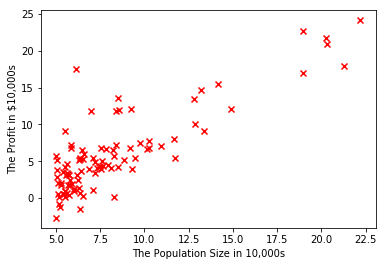

In [11]:
# Plot Data
# Note: You have to complete the code in plotData.m
plt.scatter(X[:,1], y, c='r', marker='x', linewidths=1)
plt.xlabel('The Population Size in 10,000s')
plt.ylabel('The Profit in $10,000s')

In [12]:
# =================== Part 3: Cost and Gradient descent ===================# Some gradient descent settings

#Initialize some useful values
iterations = 1500
alpha = 0.01
theta = [[0],[0]]
m = y.size  # number of training examples

print('\nTesting the cost function ...\n')

# Definite the cost of a particular choice of theta, and set J to the cost
def computeCost(X, y, theta):       
    J = np.sum(np.square(X.dot(theta)-y)) / (2 * m)
    return(J)  

# compute and display initial cost
J = computeCost(X, y, theta)
print('With theta = [[0],[0]]\nCost computed = %r\n' %J)
print('Expected cost value (approx) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, [[-1],[2]])
print('\nWith theta = [[-1],[2]]\nCost computed = %r\n' %J)
print('Expected cost value (approx) 54.24\n')


Testing the cost function ...

With theta = [[0],[0]]
Cost computed = 32.072733877455676

Expected cost value (approx) 32.07


With theta = [[-1],[2]]
Cost computed = 54.242455082012377

Expected cost value (approx) 54.24



In [14]:
print('\nRunning Gradient Descent ...\n')

#Perform a single gradient step on the parameter vector theta
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    J_history = np.zeros(num_iters) 
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(X.T.dot(h-y))/m
        J_history[iter] = computeCost(X, y, theta) # Save the cost J in every iteration
    return (theta, J_history)

# run gradient descent
theta , Cost = gradientDescent(X, y)


Running Gradient Descent ...



Theta found by gradient descent:

array([-3.63029144,  1.16636235])

Expected theta values (approx)

 -3.6303, 1.1664



Text(0.5,0,u'Iterations')

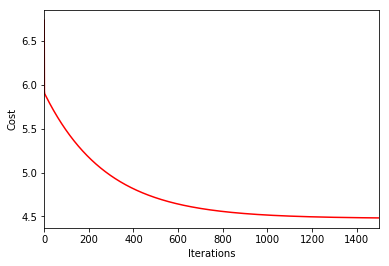

In [15]:
# print theta to screen
print('Theta found by gradient descent:\n')
print('%r\n'% theta.ravel())
print('Expected theta values (approx)\n')
print(' -3.6303, 1.1664\n')

# Plot the linear fit
plt.plot(Cost, 'r')
plt.xlim(0,1500)
plt.ylabel('Cost')
plt.xlabel('Iterations')

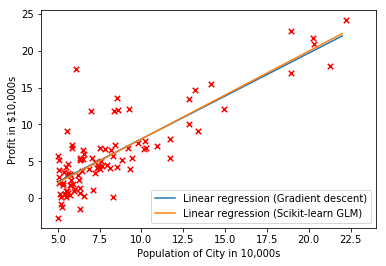

In [18]:
# ============= Part 4: Visualizing J(theta_0, theta_1) =============
# print('Visualizing J(theta_0, theta_1) ...\n')
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4)

In [19]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[ 4519.7678677]
[ 45342.45012945]


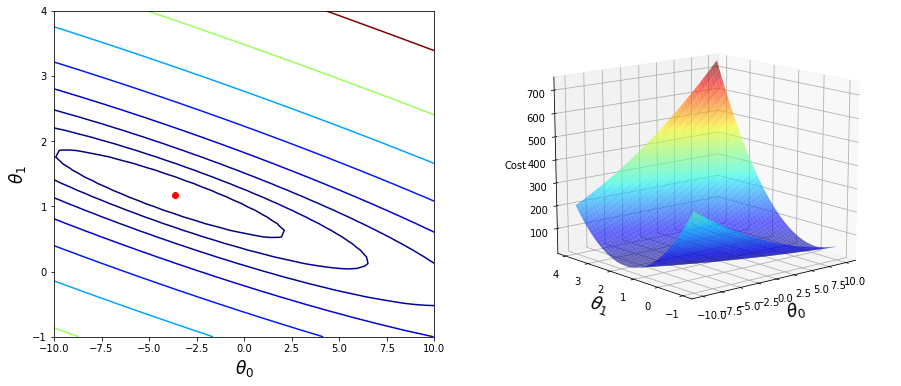

In [22]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)